In [2]:
import pandas as pd

import obspy
from obspy import read, read_inventory
from obspy.signal import PPSD
import numpy as np
import statistics
from obspy.imaging.cm import viridis_white
from obspy import UTCDateTime
import matplotlib.pyplot as plt

In [55]:
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = 24, 19
plt.rc('xtick', labelsize=15)
plt.rc('font', size=15, weight='normal')
plt.rc('ytick', labelsize=15)
plt.rcParams["axes.labelsize"] = 25
plt.rcParams["axes.labelweight"] = 'normal'
plt.rcParams["lines.markersize"] = 15

plt.rc('xtick.major',size=4,width=2)
plt.rc('ytick.major',size=4,width=2)
plt.rc('xtick.minor',visible=True,size=4,width=2)
plt.rc('ytick.minor',visible=True,size=4,width=2)



plt.rcParams['savefig.dpi'] =300

In [4]:
file = r"Wind Speed/WindSpeedHourly29January_30March_2014.csv"
    
df1=pd.read_csv(file, parse_dates=True, index_col=0) 

In [5]:
df1 = df1.resample('6H').mean()

In [8]:
df1

,HWSavg[m/s],HWSmax[m/s],WD[deg]
2014-01-29 00:00:00,1.377667,1.792333,103.500000
2014-01-29 06:00:00,2.206667,2.602167,207.800000
2014-01-29 12:00:00,3.441667,4.084833,218.400000
2014-01-29 18:00:00,2.444833,3.212000,106.783333
2014-01-30 00:00:00,3.386167,3.808167,100.966667
...,...,...,...
2014-03-29 18:00:00,6.471167,8.601667,10.381667
2014-03-30 00:00:00,8.219500,10.961667,53.183333
2014-03-30 06:00:00,7.953667,11.176667,26.243333
2014-03-30 12:00:00,9.410000,11.366667,26.411667


In [11]:
file = r"RMS_and_number_of_events_every6h.csv"
    
df2=pd.read_csv(file, parse_dates=True, index_col=0) 

In [7]:
df2

,1.0-50.0,event
2014-01-29 00:00:00,1.845307e-09,5
2014-01-29 06:00:00,8.543274e-09,14
2014-01-29 12:00:00,3.583311e-09,7
2014-01-29 18:00:00,3.663334e-09,3
2014-01-30 00:00:00,2.706540e-09,2
...,...,...
2014-03-29 18:00:00,3.520703e-09,0
2014-03-30 00:00:00,2.877350e-09,0
2014-03-30 06:00:00,3.281049e-09,0
2014-03-30 12:00:00,2.477353e-09,0


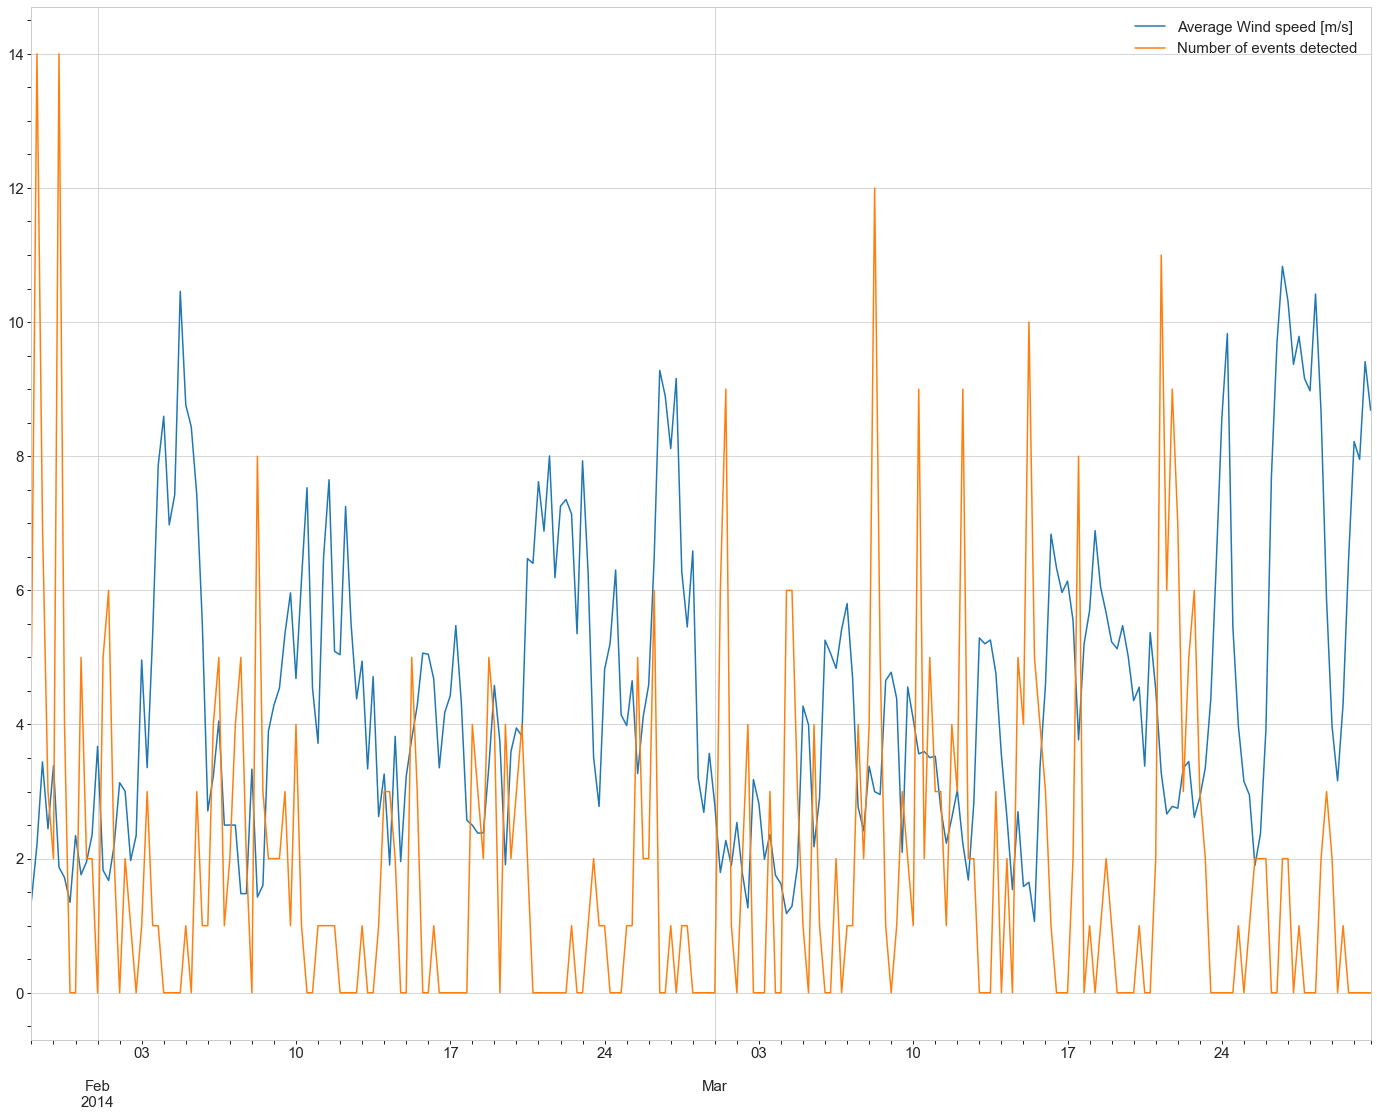

In [14]:
ax = df1['HWSavg[m/s]'].plot(label='Average Wind speed [m/s]')
df2['event'].plot(ax=ax, label='Number of events detected')
plt.legend()

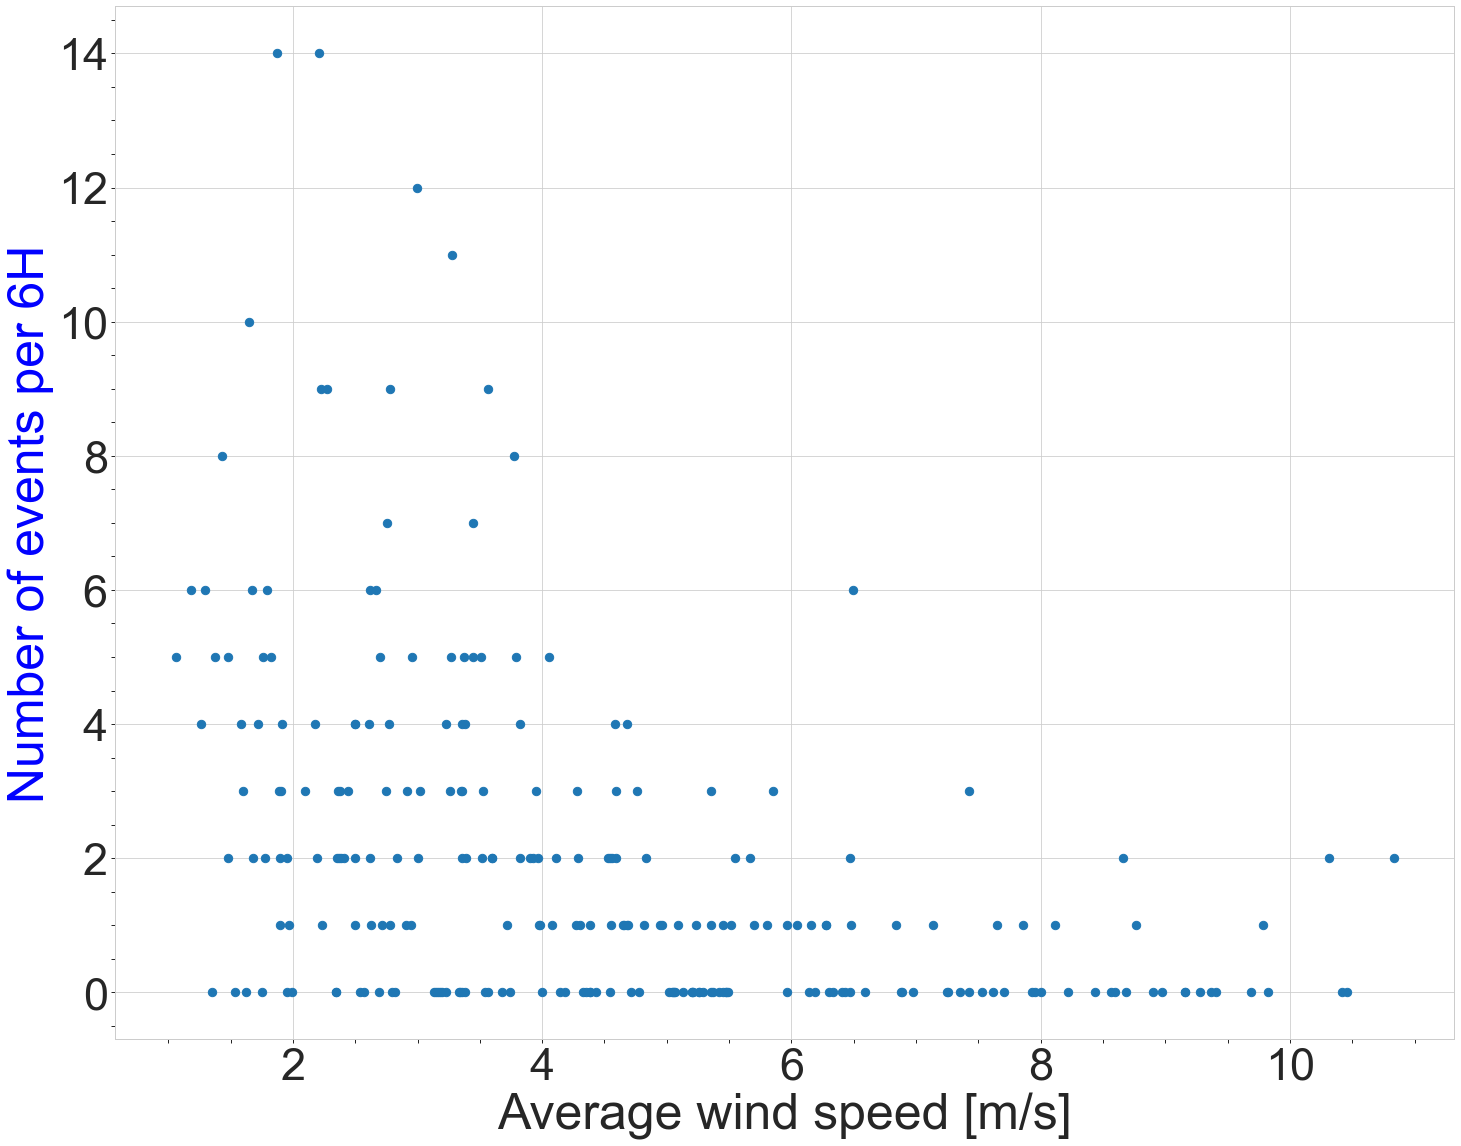

In [48]:
x = df1['HWSavg[m/s]']
y = df2['event']
plt.xlabel('Average wind speed [m/s]', size=50)
plt.ylabel('Number of events per 6H', size=50, c='b')
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
plt.scatter(x, y, s=70 )
plt.savefig('avgWS_vs_nbr_of_events_08.2021.png')

In [ ]:
plt.figure(figsize=(11,5))
plt.xlabel('', size=16)

import matplotlib.dates as mdates


from matplotlib.dates import DateFormatter

import matplotlib.ticker as mticker
mticker.Locator.MAXTICKS = 2000

ax1 = df2['RMS'].plot.bar(color='red', grid=False, alpha=0.6)

ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
df2['event'].plot.bar(ax=ax2, color='blue', grid=False, alpha=0.6)

#ax3 = ax1.twinx()
#ax3.spines['right'].set_position(('axes', 1.1))
#df2['HWSavg[m/s]'].plot.bar(ax=ax3, color='green', grid=False, alpha=0.6)




n=24
ticks = ax1.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax1.xaxis.get_ticklabels()]
ax1.xaxis.set_ticks(ticks[::n],)
formatter = DateFormatter('%Y-%m-%d')
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_ticklabels(ticklabels[::n])
ax1.tick_params(axis='x', rotation=90)

ax1.set_ylim(0.15,0.35)



#ax1.set_xticklabels([dt.strftime('%Y-%m-%d') for dt in df2.index.to_pydatetime()], size=10, rotation=0)

ax1.set_ylabel("RMS [µm/s]", color='red', size=16 )
ax2.set_ylabel("Number of events per 6H", color='blue', size=16)
#ax3.set_ylabel("Average wind speed per 6H [m/s]", color='green', size=16)
plt.tight_layout()
#plt.savefig('RMS_wind_Number_of_events_per_6h.png')




In [ ]:
plt.figure(figsize=(11,5))
plt.xlabel('', size=16)

import matplotlib.dates as mdates


from matplotlib.dates import DateFormatter

import matplotlib.ticker as mticker
mticker.Locator.MAXTICKS = 2000

ax1 = df2['RMS'].plot.bar(color='red', grid=False, alpha=0.6)

ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
df2['event'].plot.bar(ax=ax2, color='blue', grid=False, alpha=0.6)

#ax3 = ax1.twinx()
#ax3.spines['right'].set_position(('axes', 1.1))
#df2['HWSavg[m/s]'].plot.bar(ax=ax3, color='green', grid=False, alpha=0.6)




n=24
ticks = ax1.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax1.xaxis.get_ticklabels()]
ax1.xaxis.set_ticks(ticks[::n],)
formatter = DateFormatter('%Y-%m-%d')
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_ticklabels(ticklabels[::n])
ax1.tick_params(axis='x', rotation=90)

ax1.set_ylim(0.15,0.35)



#ax1.set_xticklabels([dt.strftime('%Y-%m-%d') for dt in df2.index.to_pydatetime()], size=10, rotation=0)

ax1.set_ylabel("RMS [µm/s]", color='red', size=16 )
ax2.set_ylabel("Number of events per 6H", color='blue', size=16)
#ax3.set_ylabel("Average wind speed per 6H [m/s]", color='green', size=16)
plt.tight_layout()
#plt.savefig('RMS_wind_Number_of_events_per_6h.png')




In [ ]:
#With wind speed
def plot_multi(data, cols=None, spacing=.1, **kwargs):

    from pandas import plotting

    # Get default color style from pandas - can be changed to any other color list
    if cols is None: cols = data.columns
    if len(cols) == 0: return
    colors = plotting._style._get_standard_colors(num_colors=len(cols))

    # First axis
    ax = data.loc[:, cols[0]].plot(label=cols[0], color=colors[0], **kwargs)
    ax.set_ylabel(ylabel=cols[0])
    lines, labels = ax.get_legend_handles_labels()

    for n in range(1, len(cols)):
        # Multiple y-axes
        ax_new = ax.twinx()
        ax_new.spines['right'].set_position(('axes', 1 + spacing * (n - 1)))
        data.loc[:, cols[n]].plot(ax=ax_new, label=cols[n], color=colors[n % len(colors)], **kwargs)
        ax_new.set_ylabel(ylabel=cols[n])

        # Proper legend position
        line, label = ax_new.get_legend_handles_labels()
        lines += line
        labels += label

    ax.legend(lines, labels, loc=0)
    return ax

In [ ]:
plot_multi(df2, figsize=(10, 5))

In [1]:
#Figure 5 a and b with same y axis; dpi = 300

In [10]:
df3 = pd.read_csv('RMS_values_derived_from_WS.csv')

In [13]:
df3['Unnamed: 0'] = pd.to_datetime(df3['Unnamed: 0']).dt.date

In [19]:
df3

,HWSavg[m/s],event,RMS
,,,
2014-01-29,1.4,5,0.164653
2014-01-29,2.2,14,0.169420
2014-01-29,3.4,7,0.176850
2014-01-29,2.4,3,0.170634
2014-01-30,3.4,2,0.176850
...,...,...,...
2014-03-29,6.5,0,0.206421
2014-03-30,8.2,0,0.255303
2014-03-30,8.0,0,0.248891


In [15]:
df3 = df3.rename(columns={'Unnamed: 0': ''})

In [16]:
df3 = df3.set_index('')

In [20]:
#Plot a)

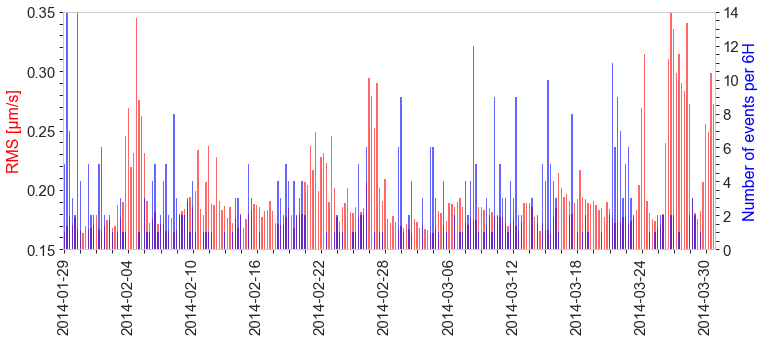

In [49]:
plt.figure(figsize=(11,5))
plt.xlabel('', size=16)

import matplotlib.dates as mdates


from matplotlib.dates import DateFormatter

import matplotlib.ticker as mticker
mticker.Locator.MAXTICKS = 2000

ax1 = df3['RMS'].plot.bar(color='red', grid=False, alpha=0.6)

ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
df3['event'].plot.bar(ax=ax2, color='blue', grid=False, alpha=0.6)

#ax3 = ax1.twinx()
#ax3.spines['right'].set_position(('axes', 1.1))
#df3['HWSavg[m/s]'].plot.bar(ax=ax3, color='green', grid=False, alpha=0.6)




n=24
ticks = ax1.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax1.xaxis.get_ticklabels()]
ax1.xaxis.set_ticks(ticks[::n],)
formatter = DateFormatter('%Y-%m-%d')
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_ticklabels(ticklabels[::n])
ax1.tick_params(axis='x', rotation=90)

ax1.set_ylim(0.15,0.35)
ax2.set_ylim(0, 14)




#ax1.set_xticklabels([dt.strftime('%Y-%m-%d') for dt in df3.index.to_pydatetime()], size=10, rotation=0)

ax1.set_ylabel("RMS [µm/s]", color='red', size=16 )
ax2.set_ylabel("Number of events per 6H", color='blue', size=16)
#ax3.set_ylabel("Average wind speed per 6H [m/s]", color='green', size=16)
plt.tight_layout()
plt.savefig('RMS_wind_Number_of_events_per_6h_Figure_5_a.png', dpi=300)




In [21]:
#Plot b)

In [40]:
df2['event'].max()

14

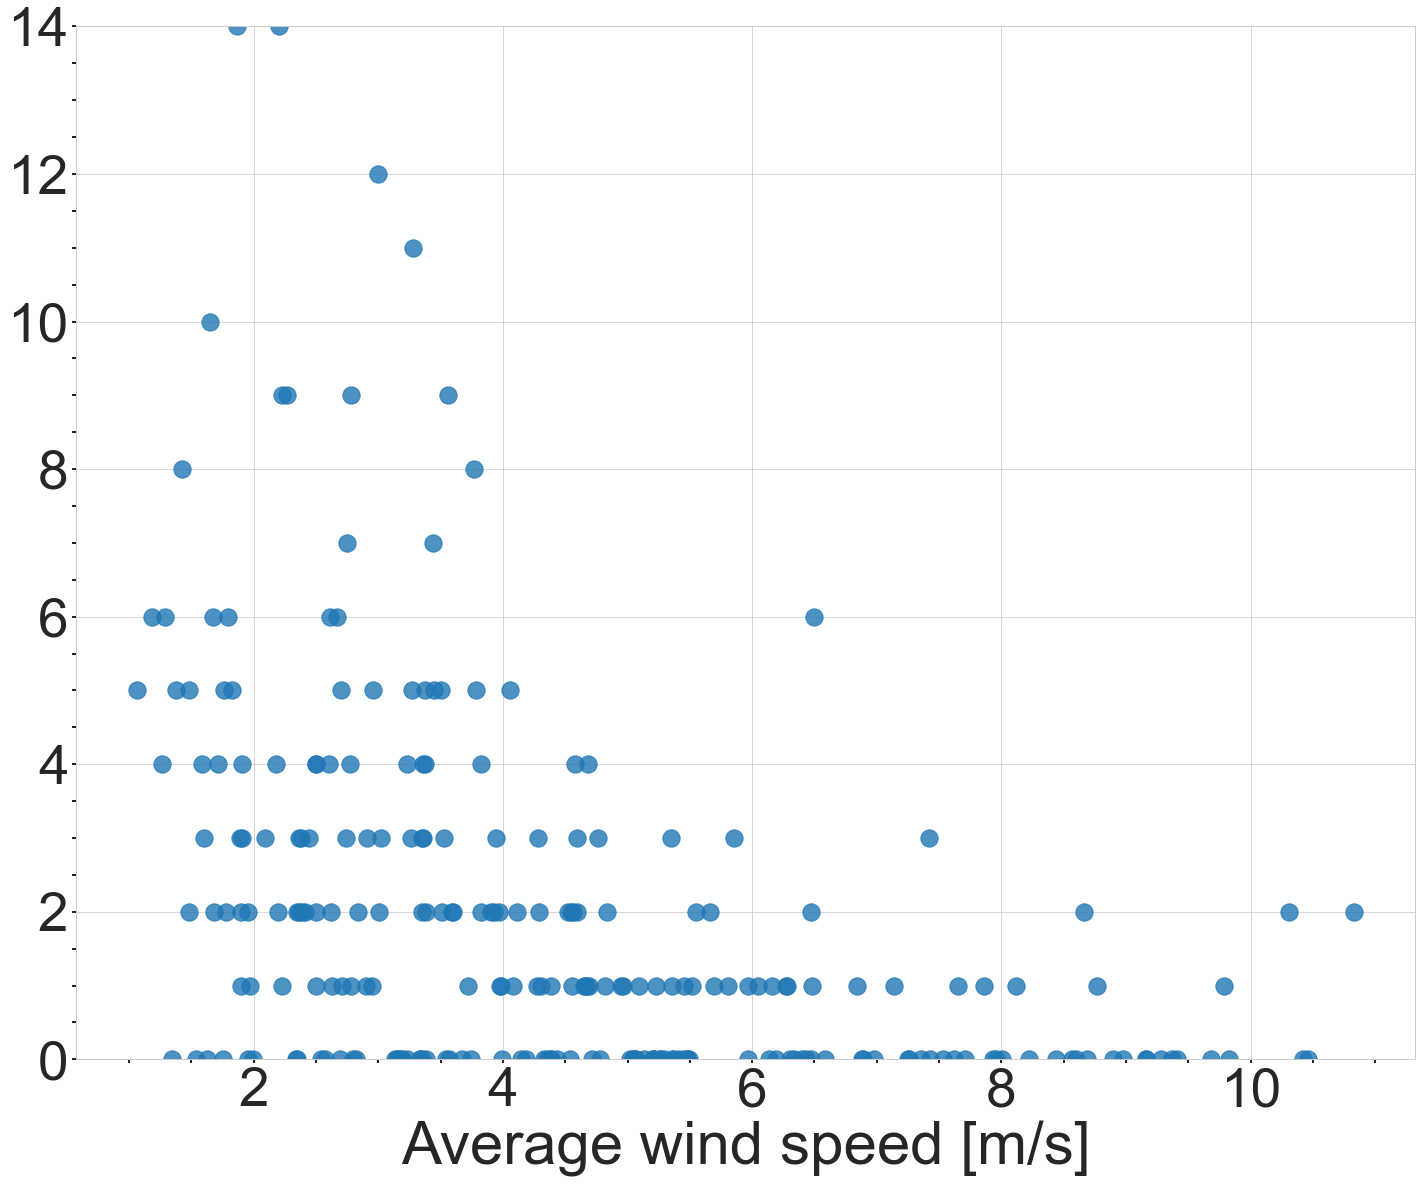

In [67]:
x = df1['HWSavg[m/s]']
y = df2['event']
y_ticks = np.arange(0, 5, 2)
plt.xlabel('Average wind speed [m/s]', size=60)
#plt.ylabel('Number of events per 6H', size=60, c='b')
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
#ax.set_yticklabels([])
plt.ylim(0, 14)
plt.scatter(x, y, s=300, alpha=0.8 )
plt.savefig('avgWS_vs_nbr_of_events_08.2021_Figure_5_b_without_y_gras.png', dpi=300)

AttributeError: 'AxesSubplot' object has no attribute 'df3'

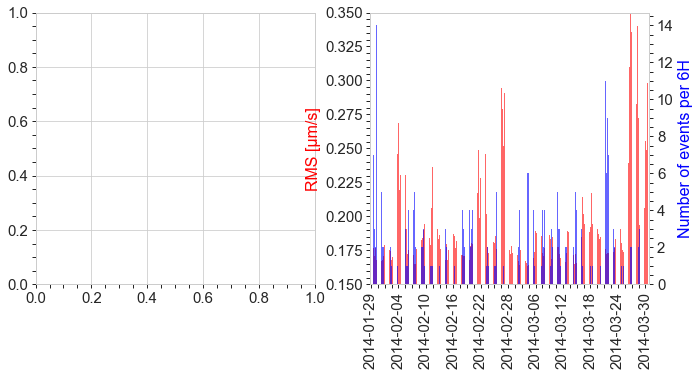

In [35]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11,5))

ax1 = df3['RMS'].plot.bar(color='red', grid=False, alpha=0.6)

ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
df3['event'].plot.bar(ax=ax2, color='blue', grid=False, alpha=0.6)






n=24
ticks = ax1.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax1.xaxis.get_ticklabels()]
ax1.xaxis.set_ticks(ticks[::n],)
formatter = DateFormatter('%Y-%m-%d')
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_ticklabels(ticklabels[::n])
ax1.tick_params(axis='x', rotation=90)

ax1.set_ylim(0.15,0.35)




#ax1.set_xticklabels([dt.strftime('%Y-%m-%d') for dt in df3.index.to_pydatetime()], size=10, rotation=0)

ax1.set_ylabel("RMS [µm/s]", color='red', size=16 )
ax2.set_ylabel("Number of events per 6H", color='blue', size=16)

x = df1['HWSavg[m/s]']
y = df2['event']



ax3.scatter(x, y, s=70 )

#df3['HWSavg[m/s]'].plot.bar(ax=ax3, color='green', grid=False, alpha=0.6)